In [1]:
import sys
import os
import os.path as osp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LogNorm
import math
import _pickle as pickle

import astropy.constants as ac
import astropy.units as au

sys.path.insert(0,'..')
import pyathena as pa

In [2]:
import pandas as pd

from pyathena import LoadSim
from pyathena.util.units import Units

from pyathena.tigress_ncr.hst import Hst
from pyathena.tigress_ncr.load_sim_tigress_ncr import LoadSimTIGRESSNCRAll
from pyathena.fields import fields


In [3]:
models = dict(classic = '/data/comejuliet/NCRSP/R8_8pc_NCRSP.classic.y1.b10.v3.768.xy2048.eps1.e-8/',
              ncr = '/data/comejuliet/NCRSP/R8_8pc_NCRSP.full.y1.b10.v3.768.xy2048.eps1.e-8/',
              no_spiral = '/data/comejuliet/NCRSP/R8b_8pc_NCR.full.v3.xy2048.eps1.e-8/',
              no_spiral_early = '/data/comejuliet/NCRSP/R8b_8pc_NCR.full.v3/')
              #demo = '/data/comejuliet/NCRSP/R8_8pc_NCRSP.full.y2.xy1024.eps0.np768.has/')
sa = pa.LoadSimTIGRESSNCRAll(models)

# MODELS
ncr = sa.set_model('ncr')
classic = sa.set_model('classic')
no_spiral = sa.set_model('no_spiral')
no_spiral_early = sa.set_model('no_spiral_early')

LoadSimTIGRESSNCR-WARNING: zprof files not found in /data/comejuliet/NCRSP/R8_8pc_NCRSP.full.y1.b10.v3.768.xy2048.eps1.e-8.
LoadSimTIGRESSNCR-WARNING: rst files not found in /data/comejuliet/NCRSP/R8_8pc_NCRSP.full.y1.b10.v3.768.xy2048.eps1.e-8.
/home/comejuliet/miniconda3/envs/pyathena/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
LoadSimTIGRESSNCR-WARNING: zprof files not found in /data/comejuliet/NCRSP/R8_8pc_NCRSP.classic.y1.b10.v3.768.xy2048.eps1.e-8.
LoadSimTIGRESSNCR-WARNING: rst files not found in /data/comejuliet/NCRSP/R8_8pc_NCRSP.classic.y1.b10.v3.768.xy2048.eps1.e-8.
LoadSimTIGRESSNCR-WARNING: zprof files not found in /data/comejuliet/NCRSP/R8b_8pc_NCR.full.v3.xy2048.eps1.e-8.
LoadSimTIGRESSNCR-WA

In [4]:
#loading VTK files
s = ncr
ds = s.load_vtk(s.nums[5])
h = s.read_hst()

Text(0, 0.5, '$Q_{i}/{Area}[s^{-1}kpc^{-2}]$\n$\\Sigma_{SFR,10 Myr}x 10^{53} [M_{\\odot}kpc^-2yr^-1]$')

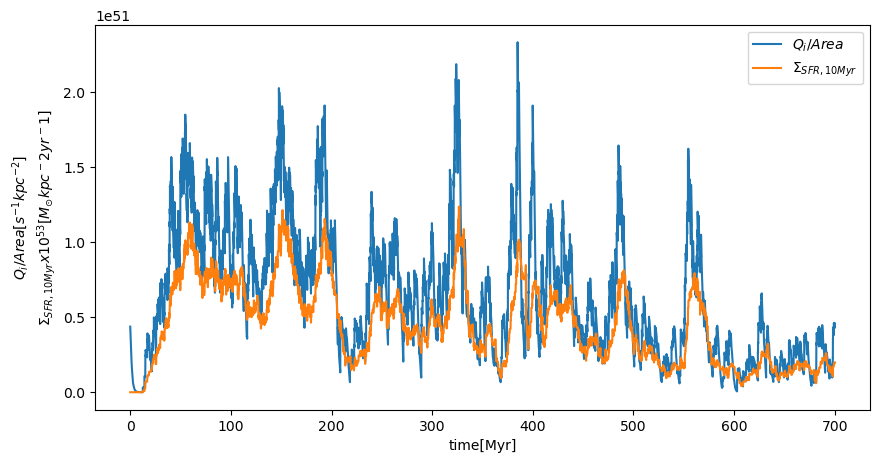

In [5]:
plt.figure(figsize=(10,5))
Lx = s.domain['Lx'][0]/10**3
Ly = s.domain['Lx'][1]/10**3
plt.plot(h['Qtot_PH']/(Lx*Ly),label='$Q_{i}/Area$')
plt.plot(h['sfr10']*1.e53, label='$\Sigma_{SFR,10Myr}$')
plt.legend()
plt.xlabel('time[Myr]')
plt.ylabel(r"$Q_{i}/{Area}[s^{-1}kpc^{-2}]$"
           "\n"
           r"$\Sigma_{SFR,10 Myr}x 10^{53} [M_{\odot}kpc^-2yr^-1]$")



In [6]:
ds.derived_field_list

['rho',
 'nH',
 'pok',
 'r',
 'vmag',
 'vr',
 'vx',
 'vy',
 'vz',
 'cs',
 'csound',
 'Mr',
 'Mr_abs',
 'T',
 'Td',
 'cool_rate',
 'heat_rate',
 'net_cool_rate',
 'Lambda_cool',
 'nHLambda_cool',
 'nHLambda_cool_net',
 'Gamma_heat',
 't_cool',
 'vAmag',
 'vAx',
 'vAy',
 'vAz',
 'Bx',
 'By',
 'Bz',
 'Bmag',
 'nH2',
 '2nH2',
 'xH2',
 '2xH2',
 'nHI',
 'xHI',
 'nHII',
 'xHII',
 'nHn',
 'xn',
 'ne',
 'nesq',
 'xe',
 'xCI',
 'nCI',
 'xOII',
 'xCII',
 'xCII_alt',
 'xi_CR',
 'T_alt',
 'chi_PE',
 'chi_LW',
 'chi_FUV',
 'Erad_LyC',
 'Uion',
 'j_Halpha',
 'Erad_FUV',
 'heat_ratio',
 'NHeff',
 'heat_rate_HI_phot',
 'heat_rate_H2_phot',
 'heat_rate_dust_LyC',
 'heat_rate_dust_FUV',
 'heat_rate_dust_UV',
 'psi_gr',
 'eps_pe',
 'Gamma_pe',
 'chi_H2',
 'chi_CI',
 'fshld_H2',
 'j_X']

In [7]:
fields = ds.get_field(['T','nH','xe','j_Halpha','xHI','xH2','pressure','density'])

In [8]:
# code unit are stored as astropy.units objects
s.u.length, s.u.mass, s.u.time, s.u.velocity 

(<Quantity 1. pc>,
 <Quantity 0.03462449 solMass>,
 <Quantity 3.08567758e+13 s>,
 <Quantity 1. km / s>)

In [9]:
# To convert code time to Myr, we can multiply code_time by u.Myr
# That is, u.Myr = code.time.to('Myr').value
s.u.Myr, s.u.kms, s.u.Msun, s.u.pc, s.u.pc

(0.9777922216807893, 1.0, 0.0346244904274392, 1.0, 1.0)

In [10]:
# Halpha emissivity [erg/s/cm^-3/sr]
# Caution: Draine (2011)'s alpha_eff_Halpha valid for ~1000 K < T < ~30000 K
# Better to use this for warm gas only

hnu_Halpha = (ac.h*ac.c/(6562.8*au.angstrom)).to('erg')

# this is equivalent to T4 = fields['T']/1.e4
T4 = (fields['pressure']/(fields['density']*(1.1 + fields['xe'] - fields['xH2']))/\
                (ac.k_B/s.u.energy_density).cgs.value)/1e4

alpha_eff_Halpha = 1.17e-13*T4**(-0.942 -0.031 * np.log(T4))

idx = (T4 > 0.1) * (T4 < 3)
            
# Jeonggyu's procedure 
j_Halpha = fields['nH']**2*(1.0 - fields['xHI'] - fields['xH2'])*fields['xe']*\
            alpha_eff_Halpha*hnu_Halpha/(4.0*np.pi)

In [24]:
# Integration along the z-axis (face on view)
dz = s.domain['dx'][2]*ac.pc.cgs # Delta z in cm
dlum = 4.0*np.pi*j_Halpha.sum(dim='z')*dz.cgs.value # [erg/s/cm-2/sr]

In [27]:
dz.cgs.value

2.468542065193094e+19

In [28]:
dz.sum()

<Quantity 2.46854207e+19 cm>

In [29]:
Ly = s.domain['Lx'][1]*ac.pc.cgs

In [30]:
ac.pc.cgs

<Quantity 3.08567758e+18 cm>

In [31]:
Ly.cgs.value

6.31946768689432e+21

In [32]:
#dlum = 4.0*np.pi*np.trapz(j_Halpha,axis=0)
dy = s.domain['dx'][1]*ac.pc.cgs # Delta z in cm
#lum = 4.0*np.pi*np.trapz(dlum,axis=0)/256
lum = dlum.sum(dim='y')*dy.cgs.value/Ly.cgs.value # [erg/s/cm-2]

Text(0, 0.5, '$H_{\\alpha}$ luminosity density $[erg/s/cm^{2}]$')

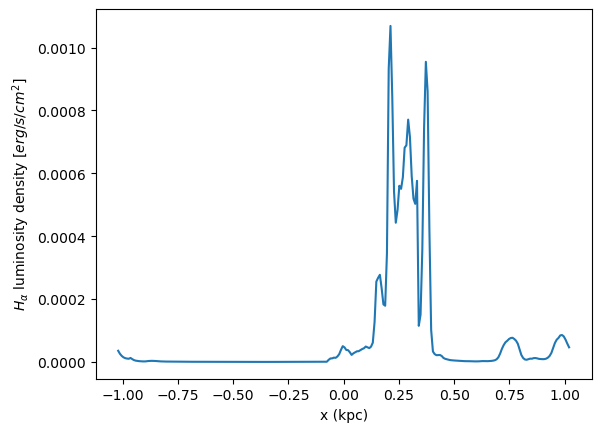

In [33]:
plt.plot(fields['x']/1000, lum)
#plt.plot(fields['x']/1000, L_avgy)
plt.xlabel('x (kpc)')
plt.ylabel(r'$H_{\alpha}$ luminosity density $[erg/s/cm^{2}]$')

Text(0, 0.5, '$ \\Sigma_{SFR}\\  (M_{\\odot} Myr^{-1} pc^{-2})$')

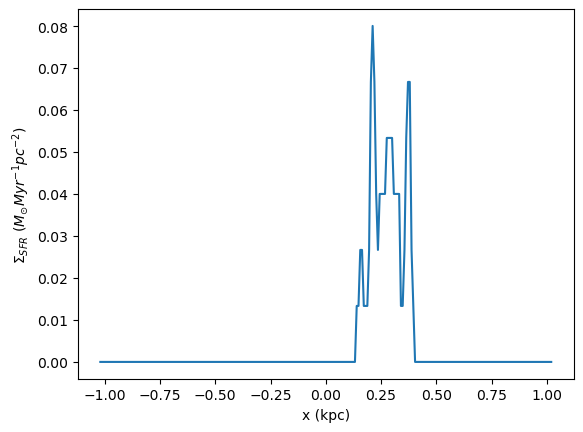

In [44]:
sigma_SFR_halpha = 7.9e-42*lum*1.e6*ac.pc.cgs**2 #[Msun cm^-2 yr^-1] --> #[Msun pc^-2 Myr^-1]
#sigma_SFR_halpha =  sigma_SFR_halpha*1.e6*ac.pc.cgs**2 #[Msun pc^-2 Myr^-1]
sigma_SFR_halpha_m = np.trapz(sigma_SFR_halpha,axis=0)/256

#sigma_SFR_halpha_m = sigma_SFR_halpha.sum(dim='x')*dy.cgs.value/Ly.cgs.value

plt.plot(fields['x']/1000, sigma_SFR_halpha)
plt.xlabel('x (kpc)')
plt.ylabel(r'$ \Sigma_{SFR}\  (M_{\odot} Myr^{-1} pc^{-2})$')

In [29]:
# Integration along the z-axis (face on view)
dz = s.domain['dx'][2]*ac.pc.cgs # Delta z in cm
NH = fields['nH'].sum(dim='z')*dz.cgs.value # Hydrogen column [cm^-2]
dz.to('pc')

<Quantity 8. pc>

<xarray.DataArray 'nH' (y: 1, x: 1)>
array([[2.0000619e+22]], dtype=float32)
Coordinates:
  * x        (x) float64 284.0
  * y        (y) float64 -740.0

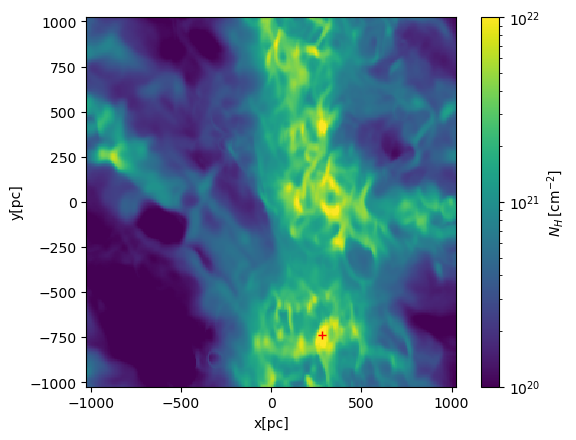

In [30]:
# plot of NH
plt.pcolormesh(fields['x'],fields['y'],NH,norm=LogNorm(1e20,1e22),shading='nearest')
#plt.pcolormesh(dd['x'],dd['y'],NH,norm=Normalize(0, 1e22),shading='nearest')
plt.gca().set_aspect('equal')
plt.xlabel('x[pc]')
plt.ylabel('y[pc]')
cbar = plt.colorbar(label=r'$N_H\,[{\rm cm^{-2}}]$')

# Mark the position where NH is maximum
NHmax = NH.where(NH == NH.max(), drop=True)
plt.plot(NHmax.x,NHmax.y,'r+')
NHmax

In [34]:
# emission measure 
# Integration along the z-axis (face on view)
dz_pc = s.domain['dx'][2] # Delta z in pc
fields['nesq'] = (fields['nH']*fields['xe'])**2

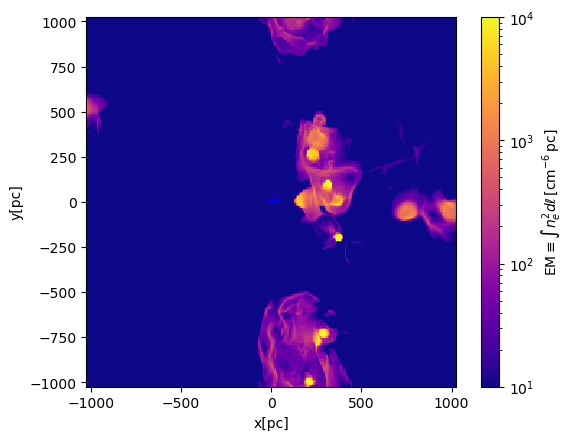

In [35]:
plt.pcolormesh(fields['x'],fields['y'],fields['nesq'].sum(dim='z')*dz_pc,norm=LogNorm(1e1,1e4),
               cmap=plt.cm.plasma,shading='nearest')
plt.gca().set_aspect('equal')
plt.xlabel('x[pc]')
plt.ylabel('y[pc]')
cbar = plt.colorbar(label=r'${\rm EM}\equiv \int n_e^2 d\ell\,[{\rm cm}^{-6}\,{\rm pc}]$')

x_los = 10
y_los = 10
plt.plot(x_los, y_los,'b+',ms=10)

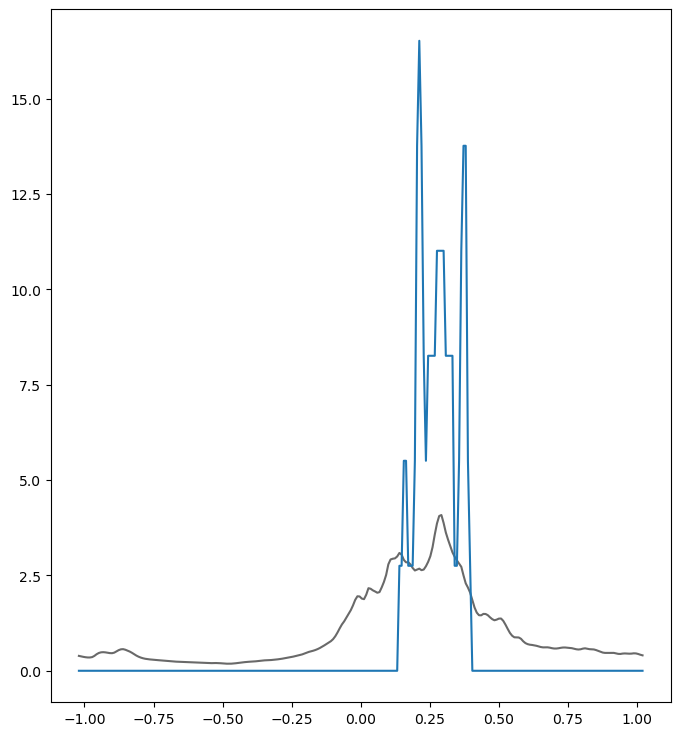

In [37]:
#calculating the normalized surface density from the vtk file
sigma = np.trapz(fields['nH'],axis=0)
sigma_yavg = (np.trapz(sigma,axis=0))/256
sigma_mean = (np.trapz(sigma_yavg,axis=0))/256

fig = plt.figure(figsize=(8,9))

fig = plt.plot(fields['x']/1000,sigma_yavg/sigma_mean,label= '$<\Sigma>/<\Sigma>_{m}$',color = 'dimgray')
#plt.plot(fields['x']/1000, sigma_SFR_halpha/sigma_SFR_halpha_m)

In [39]:
# STAR PARTICLE HISTOGRAM FOR SINGLE SNAPSHOT 

s = ncr

num = 250
ds = s.load_vtk(num=num)
fields_hist = ds.get_field(['density','nH'])
    

def mass_norm(mass):
    return np.sqrt(mass/10)
    
sp = s.load_starpar_vtk(num=num)
sp['mage'] *= s.u.Myr
sp['mass'] *= s.u.Msun
sp['x1'] *= s.u.kpc
sp['x2'] *= s.u.kpc
sp['x3'] *= s.u.kpc

#calculating the normalized surface density from the vtk file
sigma = np.trapz(fields_hist['nH'],axis=0)
sigma_yavg = (np.trapz(sigma,axis=0))/256
sigma_mean = (np.trapz(sigma_yavg,axis=0))/256

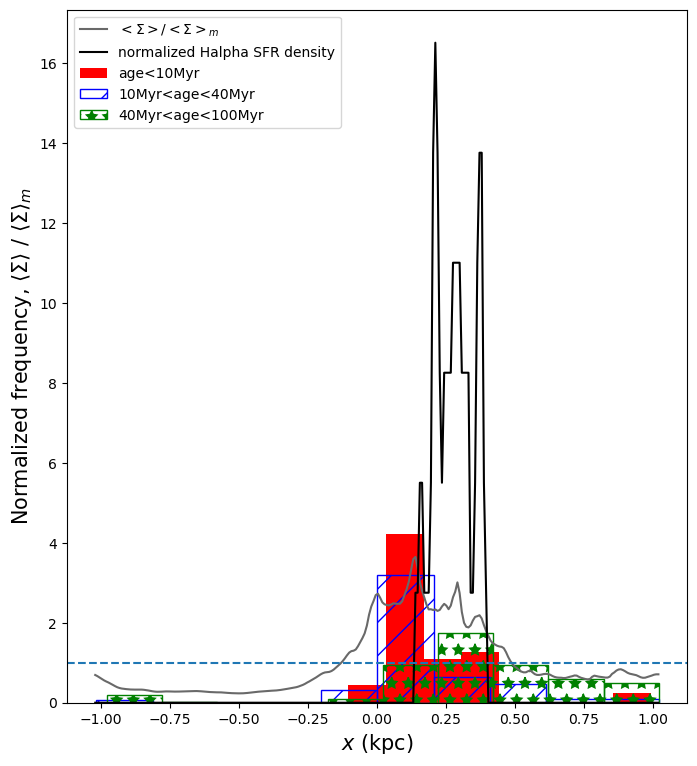

In [40]:
fig = plt.figure(figsize=(8,9))

fig = plt.plot(fields_hist['x']/1000,sigma_yavg/sigma_mean,label= '$<\Sigma>/<\Sigma>_{m}$',color = 'dimgray')
plt.plot(fields['x']/1000, sigma_SFR_halpha/sigma_SFR_halpha_m, color = 'black',label= 'normalized Halpha SFR density')

#finding the mass weighted positions of star particles in the x-direction from the starpar file
youngage = 10
adultage = 40
oldage = 100
sp10 = sp[sp.mage<youngage]
sp40 = sp[np.logical_and(sp.mage>youngage, sp.mage<adultage)]
sp100 = sp[np.logical_and(sp.mage>adultage, sp.mage<oldage)]

fig = plt.hist(sp10.x1, density=True, weights=sp10.mass,color="red", label='age<10Myr')
fig = plt.hist(sp40.x1, density=True, weights=sp40.mass,fill=False,hatch='/', ec="blue", label= '10Myr<age<40Myr')
fig = plt.hist(sp100.x1, density=True, weights=sp100.mass,fill=False,hatch='*', ec="green", label= '40Myr<age<100Myr')

fig = plt.axhline(1.,linestyle= '--')

plt.legend(loc=2)
plt.xlabel(r'$x$ (kpc)',fontsize = 15)
plt.ylabel(r'Normalized frequency, $\langle\Sigma\rangle$ / $\langle\Sigma\rangle$$_{m}$',fontsize = 15)
plt.show()

In [41]:
# comparison with SFR from star particles

# define the domain and the size of the xaxis bins

Lx = s.domain['Lx'][0]
Ly = s.domain['Lx'][1]
Nx = s.domain['Nx'][0]
Ny = s.domain['Nx'][1]
w = Lx/15

# load all the vtk files and calculate sigma_gas for each one 
sigma_gas = []
#mass_gas = []

# get the index of the vtk files
nums = s.nums
npt = len(nums)

for i in range (npt): # for every snapshot
    ds_data = s.load_vtk(num=s.nums[i])
    ds = ds_data.get_field(['density'])
    ds *= s.u.Msun
    # calculate <sigma> 
    sigma = np.trapz(ds['density'],axis=0)
    sigma_yavg = (np.trapz(sigma,axis=0))/Ny
    # bin sigma in the 15 xaxis bins 
    (sigma_snap, xbin) = np.histogram(ds.x,bins=15,range = (-Lx/2, Lx/2), weights=sigma_yavg)
    sigma_gas.append(sigma_snap)
    
    # reading the corresponding starpar files and calculate sigmaSFR for each one
def sp_reader(number):
    
    sp = s.load_starpar_vtk(num=number)
    sp['mage'] *= s.u.Myr
    sp['mass'] *= s.u.Msun
    sp['x1'] *= s.u.pc
    sp['x2'] *= s.u.pc
    # first, select only young star particles
    # "young" is a boolean array: True for young, False for old
    young = sp['age'] < 40.
    # second, separate clusters (mass != 0) and runaways (mass == 0)
    # mass of runaway OB stars was set to zero
    # "runaway" and "cluster" are also boolean arrays
    runaway=sp['mass'] == 0
    cluster=sp['mass'] != 0

    # young * cluster is True for young and cluster particles
    young_cluster = young & cluster
    spyoung = sp[young_cluster]

    return spyoung



sp = []
for i in range (npt):   
    sp.append(sp_reader(nums[i]))
    
# making a histogram of the total star mass in each x axis bin, for each snapshot 
Msp = np.zeros((npt,15))
xbin = np.zeros((npt,16))

for i in range (npt):
    (Msp[i,:], xbin[i,:]) = np.histogram(sp[i].x1, bins=15, range = (-Lx/2, Lx/2), weights=sp[i].mass)
    
# calculating sigma_SFR in each bin, for each snapshot
sigma_SFR = []

agemax = 40
for i in range (npt):
    sigma_SFR.append(Msp[i,:]/(agemax*w*Ly))  

In [47]:
w

136.53333333333333

In [43]:
sigma_SFR

array([0.        , 0.        , 0.        , 0.        , 0.00049741,
       0.        , 0.        , 0.00281387, 0.02883314, 0.02397232,
       0.00571195, 0.00167686, 0.00073009, 0.00054438, 0.00204413])

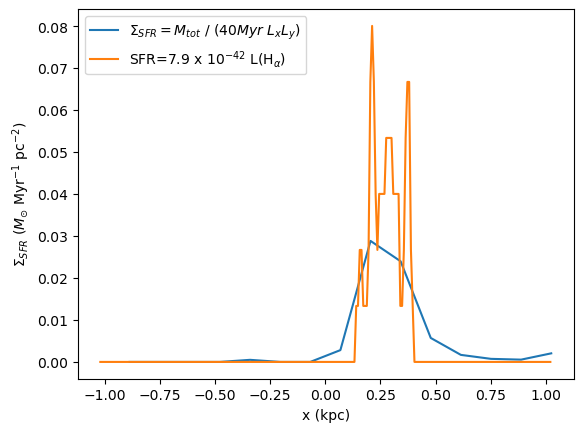

In [62]:
plt.plot(xbin[5][1:16]/1000, sigma_SFR[5],label=r'$\Sigma_{SFR}=M_{tot}$ / ($40 Myr$ $L_{x} L_{y}$)')
plt.plot(fields['x']/1000, sigma_SFR_halpha,label= r'SFR=$7.9$ x $10^{-42}$ L(H$_{\alpha}$)')
plt.xlabel('x (kpc)')
plt.ylabel(r'$\Sigma_{SFR}$ ($M_{\odot}$ Myr$^{-1}$ pc$^{-2}$)')
plt.legend()